# Introducción Ejercicio de Práctica
En este ejercicio vamos a crear un modelo funcional API en donde vamos a crear un modelo que entrene dos salidas usando un mismo dataset de entrenamiento.
En este ejercicio la compañía energética UCI nos ha pedido crear un modelo predictivo en donde podamos pronosticar el uso de energía para calefacción y enfriamiento de varios edificios.
Para esto nos ha brindado un dataset con las características de los edificios (Xs) y los consumos de energía de la aclimatación (Ys).
Con un sólo modelo debemos de pronosticar el consumo de energía del los edificios.

## Pasos a seguir
1. Instalar las bibliotecas necesarias para crear nuestro modelo funcional API.
2. Definir funciones para trabajar nuestra data y graficar nuestras métricas y leer nuestra data, para revisar con que información contamos para el entrenamiento del modelo. 
3. Construir nuestro modelo usando el método funcional.
4. Elegir las métricas de error correspondintes al tipo de modelo a usar.
5. Entrenar nuestro modelo.
6. Graficar los errores

# 1 Instalar bibliotecas necesarias
En este caso estaremos utilizando la biblioteca TensorFlow, esta nos va a permitir crear el modelo por capas e irlas agregando.
Además nos brinda la flexibilidad de crear distintos caminos en el entrenamiento de los modelos.

Para procesamiento de datos, graficar y extracción de data utilizaremos bibliotecas más conocidas como Pandas, Numpy y Matplotlib

In [76]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [77]:
pip install keras==2.12.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0



tensorflow-intel 2.18.0 requires keras>=3.5.0, but you have keras 2.12.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [79]:
!pip install pydot


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

# 2. Definir funciones y lectura de data
En esta sección vamos a definir las siguientes funciones:
1. Un que nps permitan dividir la data en los outputs esperados para el consumo de energía por calefacción y enfriamiento.
2. Una que normalice los datos de manera que estén escalados para entrenar el modelo con más facilidad.
3. Una que nos permita graficar los resultados predichos vs. los resultados esperados.
4. Una que grafique las métricas de error, comparando el dataset de entrenamiento contra el dataset de validación

Finalmente cargaremos la data y analizaremos con que estamos trabajando.

In [82]:
#Definimos una función que nos automatize la extracción del objetivo
def output_format(data): 
    output_1 = data.pop('Y1')
    output_1 = np.array(output_1)
    output_2 = data.pop('Y2')
    output_2= np.array(output_2)
    return output_1, output_2

In [83]:
#Definimos una función para normalizar el dataset de tal modo que las características tengas una escala cercana
def norm(input):
    return (input - train_stats['mean']) / train_stats['std']

In [84]:
#Graficamos las variaciones entre el resultado esperado y las predicciones
def plot_diff(output_true, output_pred, title=''):
    plt.scatter(output_true, output_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100,100],[-100,100])
    plt.show()

In [85]:
#Definimod una función para graficar metricas de error, usamos el método histoy.history para que recuerde en dónde dentro de nuestro modelo se encuetra la métrica
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_'+metric_name], color='green',label='val_'+metric_name)
    plt.show()

In [86]:
df = pd.read_excel("C:\\Users\\USER\\Desktop\\Coursera\\Modelos personalizados, capas y funciones de pérdida con TensorFlow 18.02.2025\\energy+efficiency\\ENB2012_data.xlsx")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [105]:
display(df.head(10))

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


En este caso las columnas significan lo siguiente:

X1	Relative Compactness = teoricamente que tan cercana es la fomra del edificio a su forma compatca óptima

X2	Surface Area = superficio del edificio

X3	Wall Area = tamaño de los muros en total

X4	Roof Area = superficie del techo en total

X5	Overall Height = altura total del edificio

X6	Orientation	= orientación

X7	Glazing Area = total de vidrios o ventanas

X8	Glazing Area Distribution = distribución de las ventanas

Y1	Heating Load = consumo por calefacción

Y2	Cooling Load = consumo por enfriamiento

# 3. Construir nuestro modelo
Ahora vamos a utilizar el método funcional para construir nuestro modelo capa por capa.
Dividiendo nuestros outputs, normalizando la data y creando capa por capa del modelo.

In [ ]:
#Dividimos en datasets de prueba y entrenamiento. Vemos una descripción de nuestra data de entrenamiento sin el output.
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()

In [109]:
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.763779,0.106192,0.62,0.660,0.74,0.82,0.98
X2,614.0,672.074104,88.322853,514.50,612.500,686.00,759.50,808.50
X3,614.0,318.739414,43.561835,245.00,294.000,318.50,343.00,416.50
X4,614.0,176.667345,45.259540,110.25,128.625,220.50,220.50,220.50
X5,614.0,5.244300,1.751418,3.50,3.500,3.50,7.00,7.00
X6,614.0,3.491857,1.118916,2.00,2.000,4.00,4.00,5.00
X7,614.0,0.234609,0.134091,0.00,0.100,0.25,0.40,0.40
X8,614.0,2.785016,1.547308,0.00,1.000,3.00,4.00,5.00


In [ ]:
#Usamos nuestra fórmula para definir los dos arrays que van a funcionar como output, aqui separamos "Y1 = Calefacción" de "Y2 = Frío"
train_output = output_format(train)
test_output = output_format(test)

In [ ]:
#Normalizamos la data escalando los datos
norm_train_input = norm(train)
norm_test_input = norm(test)

In [ ]:
#Definimos capas para nuestro modelo
input_layer = Input(shape=(len(train .columns),)) #Aqui definimos cuantas características van a entrar dentro del entrenamiento
first_dense = Dense(units=128, activation='relu')(input_layer)
second_dense = Dense(units=128, activation='relu')(first_dense)

In [ ]:
#Definimos el output para el primer resultado deseado en el output_Y1 y creamos una nueva capa para el output_Y2
output_Y1 = Dense(units=1, name='output_Y1')(second_dense)
third_dense = Dense(units=64, activation='relu')(second_dense)

In [92]:
#Definimos el output para el segundo resultadod eseado
output_Y2 = Dense(units=1, name='output_Y2')(third_dense)

In [93]:
#Definimos el modelo que vamos a utilizar para nuestro algoritmo
model = Model(inputs=input_layer, outputs=[output_Y1, output_Y2])
print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │      1,152 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     16,512 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      8,256 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_Y1 (Dense)   │ (None, 1)         │        129 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_Y2 (Dense)   │ (None, 1)         │         65 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,114 (102.01 KB)

 Trainable params: 26,114 (102.01 KB)

 Non-trainable params: 0 (0.00 B)

None


En esta sección podemos ver un resumen de como quedó construido nuestro modelo.

Aqui podemos observar le cantidad total de paarámetros que se ven a utilizar, los output por capa y los tipos de capas creadas.

# 4.Métricas de error y optimizador.
Ahora es tiempo de agregar a nuestro modelo un optimizador que nos va a permitir entrenar el modelo y reducír el error.
Además debemos elegir las métricas de error con las que vamos a medir nuestro modelo. 

In [ ]:
#Ahora vamos a especificar cómo vamos a optimizar nuestro modelo con la función de pérdida para ambos outputs, le agregamos una gradiante de descenso con un aprendizaje de 0.001
#La bondad de los modelos funcionales es que podemos elegir métricas de error por output, pero en este caso usaremos la misma para ambos outputs.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'output_Y1':'mse','output_Y2': 'mse'},
              metrics={'output_Y1': tf.keras.metrics.RootMeanSquaredError(),
                       'output_Y2': tf.keras.metrics.RootMeanSquaredError()})

In [95]:
from tensorflow.keras.layers import Layer

In [96]:
#Usamos este bulce para que el modelo no ignore ninguna capa
model._layers = [
    layer for layer in model.layers if isinstance(layer, Layer)
]

# 5. Entrenar el modelo
Ahora es tiempo de entrenar nuestro modelo.
En este caso le vamos a pedir que entrene 20 épocas, lo que significa que se iterará 20 veces.
También utilizara un lote de entrenamiento de 100, así que usará 100 ejemplares de características por iteración.

In [97]:
#Entrenamos al modelo y lo llamamos history de tal modo que se pueda utilizar al graficar
history = model.fit(norm_train_input, train_output, epochs=20, batch_size=100, validation_data=(norm_test_input, test_output))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1273.8777 - output_Y1_loss: 590.3015 - output_Y1_root_mean_squared_error: 24.3022 - output_Y2_loss: 681.9347 - output_Y2_root_mean_squared_error: 26.1309 - val_loss: 1000.2639 - val_output_Y1_loss: 467.5455 - val_output_Y1_root_mean_squared_error: 22.0496 - val_output_Y2_loss: 494.5264 - val_output_Y2_root_mean_squared_error: 22.6733
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 785.4889 - output_Y1_loss: 404.1014 - output_Y1_root_mean_squared_error: 20.2312 - output_Y2_loss: 369.5304 - output_Y2_root_mean_squared_error: 19.1688 - val_loss: 181.0928 - val_output_Y1_loss: 110.5480 - val_output_Y1_root_mean_squared_error: 10.7537 - val_output_Y2_loss: 62.1717 - val_output_Y2_root_mean_squared_error: 8.0901
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 114.2127 - output_Y1_loss: 69.7552 - output_Y1_root_mean_squared_error: 8.2739 - output_Y2_loss: 44.3194 - output_Y2_root_mean_squared_error: 6.6333 - val_loss: 

In [98]:
loss, loss_Y1, loss_Y2, rmse_Y1, rmse_Y2 = model.evaluate(x=norm_test_input, y=test_output)
print("Loss = {}, less_Y1 = {}, rmse_Y1 = {}, loss_Y2 = {}, rmse_Y2 = {}".format(loss, loss_Y1, rmse_Y1, loss_Y2, rmse_Y2))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.4125 - output_Y1_loss: 9.1442 - output_Y1_root_mean_squared_error: 3.0230 - output_Y2_loss: 14.1979 - output_Y2_root_mean_squared_error: 3.7705 
Loss = 21.455886840820312, less_Y1 = 8.845300674438477, rmse_Y1 = 2.9799726009368896, loss_Y2 = 12.399246215820312, rmse_Y2 = 3.5462164878845215


In [99]:
pred_output = model.predict(norm_test_input)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


# 6. Graficar métricas de error
Ahora es tiempo de usar elementos visuales para ver el rendimiento de nuestro modelo.
Usaremos gráficas de disperción y lineales para ver como funciona nuestro modelo.

La gráfica de disperción va a funcionar para comparar resultados esperados contra resultados de la predicción.

La gráfica lineal nos va a mostrar como se mueve la métrica de error durante las épocas de iteración.

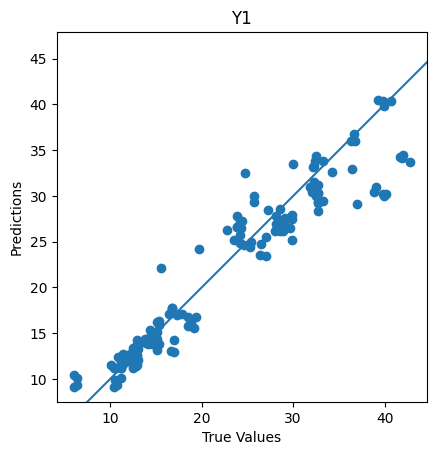

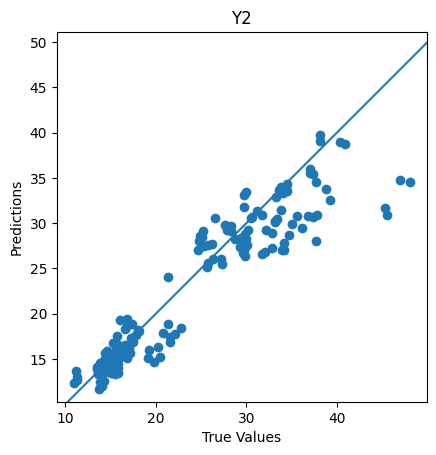

In [100]:
plot_diff(test_output[0], pred_output[0], title='Y1')
plot_diff(test_output[1], pred_output[1], title='Y2')

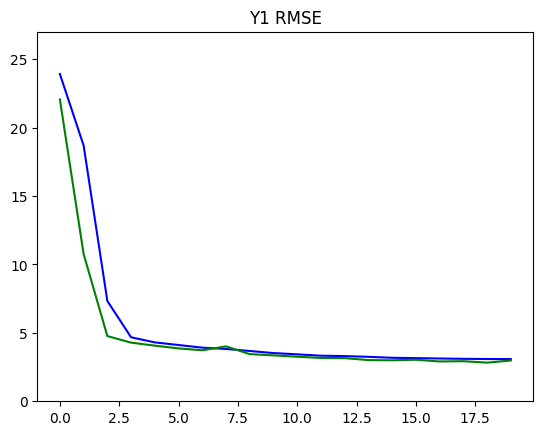

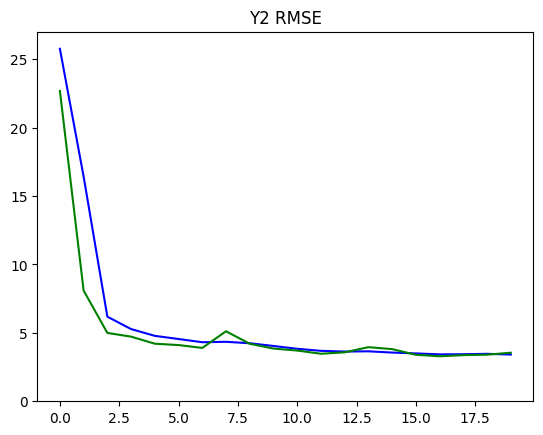

In [ ]:
plot_metrics(metric_name='output_Y1_root_mean_squared_error', title='Y1 RMSE', ylim=27)
plot_metrics(metric_name='output_Y2_root_mean_squared_error', title='Y2 RMSE', ylim=27)

#La línea azul representa la evolución de RMSE en nuestro dataset de entrenamiento, la línea verde representa el RMSE del dataset de validación.

# Conclusiones

Este ejericio es un ejericio de prueba que muestra como funciona un modelo que predice dos outpus.

Podemos apreciar como cada output tiene una forma de entrenamiento similar y que el modelo funciona de manera similar para los resultados.

En este caso vemos como mientras más iteramos, el error diminuye.

Nuestro objetivo es presentar visualmente el entrenamiento y lograr tener un modelo funcional para dos outputs.